# **Q(2)i**


---


In [34]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.linalg import norm
from numpy.linalg import eig

In [35]:
data = np.loadtxt('cm_dataset_2.csv', delimiter=',')
Y=data
L=len(data)

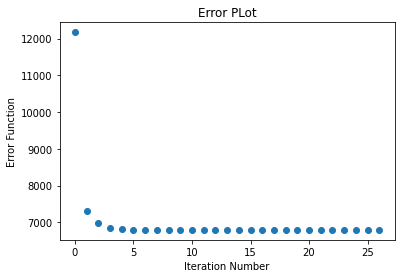

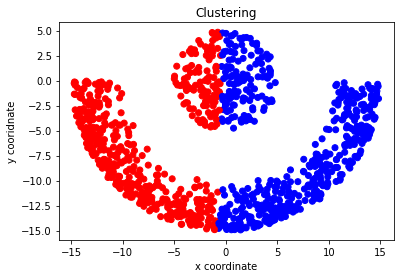

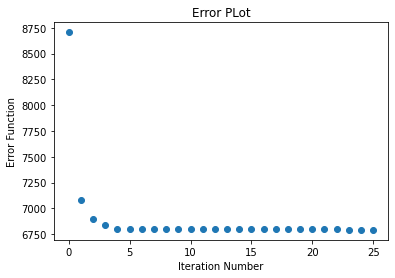

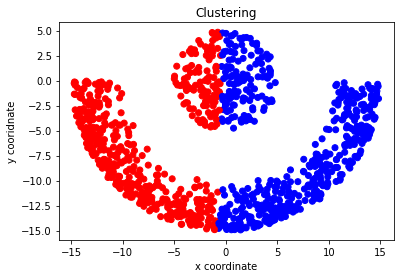

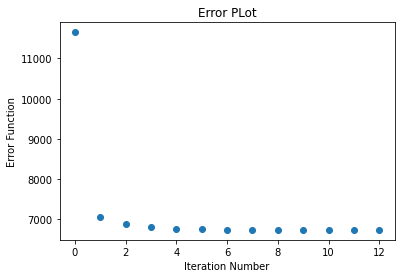

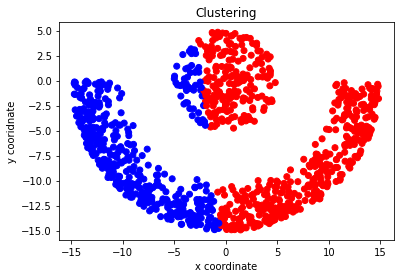

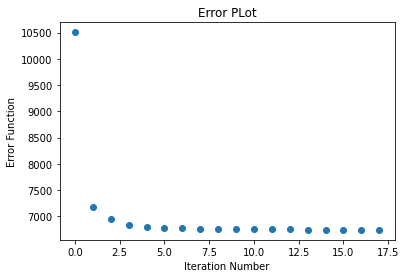

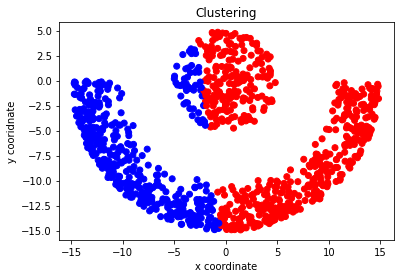

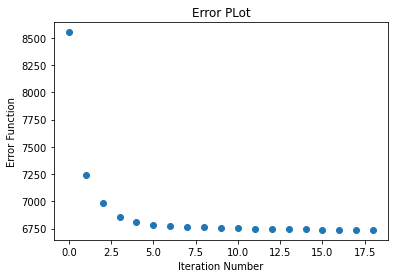

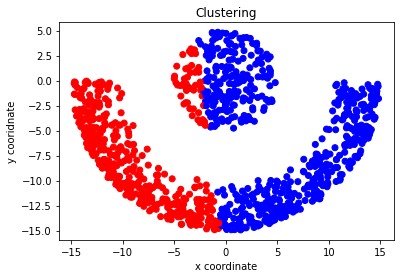

In [36]:
data=Y
def cluster_indicator(dataset,means):# assigns a indicator to the data point according to its cluster
  indicators=[]# consists of  all the indicators assigned in the order of dataset
  err=0# calculates the objective function
  for x in dataset:
    min_dist=float('inf')# finds the distance to the data point from nearest mean
    ind=0  # assigns the indicator to the datapoint according to the nearest mean
    for i,mean in enumerate(means):
      dist1=math.dist(x,mean)
      if min_dist>dist1:
        min_dist=dist1
        ind=i
    indicators.append(ind)
    err=err+min_dist
  return err,indicators

def new_k_means(dataset,indicators,k):# calculates the new means according to the assigned indicators
  new_means=np.zeros((k,2))# consists of k means according to assigned indicator to the data points
  count=np.zeros(k) # counts number of datapoints in cluster k

  for dpoint,ind in zip(dataset,indicators):
    new_means[ind]=new_means[ind]+dpoint
    count[ind]=count[ind]+1
  
  for i,[x,y] in enumerate(new_means):
    new_means[i]=[x/count[i],y/count[i]]
  return new_means

#for 5 different random intialization
for rand_init in range(5):
    ind=random.choices(range(0,L-1),k=2)# randomly choosing 2 numbers from range of datset
    k_means=data[ind,:] # choosing the data points at indices corresponding to chosen numbers
    z=np.zeros(L) # contains the cluster indicator at index i to corresponding ith data point
    objective_fun=[]# consists of objective function at each of all the iterations
    
    t=0# iteration number
    while True:
      old_k_mean=k_means
      (error,INDICATOR)=(cluster_indicator(data,k_means))#passing the data to get the objective function and dataset indicators according to assigned clusters
      Z=np.array(INDICATOR)
      objective_fun.append(error)#appending objective functions at each iteration
      k_means=new_k_means(data,INDICATOR,2)#new means are being calculated accordinging to assigned clusters

      if t!=0 and objective_fun[t]==objective_fun[t-1]:#terminates the algorithm if the objective function at present iteration is less than equal to the the objective function at previous iteration
        break
      t=t+1
    #PLotting Error Function
    plt.title("Error PLot") 
    plt.xlabel("Iteration Number") 
    plt.ylabel("Error Function")
    plt.scatter(range(0,t),objective_fun[0:t])
    plt.show()

    #plotting clusters
    plt.title("Clustering") 
    plt.xlabel("x coordinate") 
    plt.ylabel("y cooridnate")
    
    col = []
    col = np.where(Z==0,'r','b')
    plt.scatter(data[:,0], data[:,1], c=col)
    plt.show()
    


# **Q(2)ii**

In [37]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


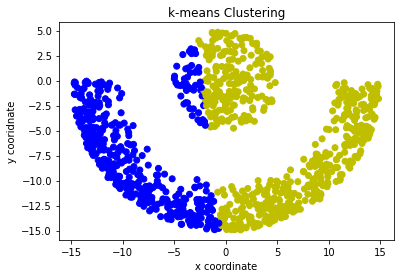

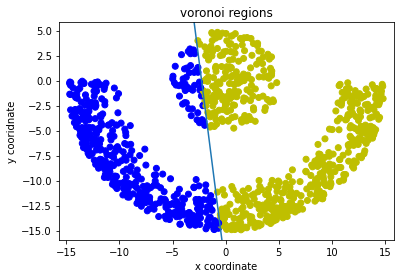

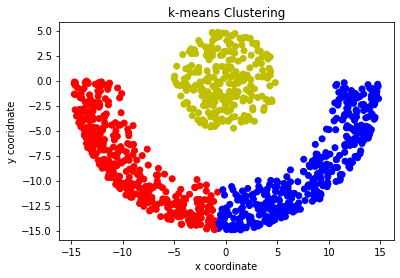

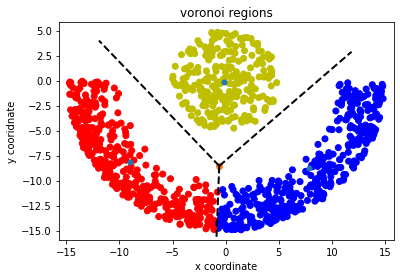

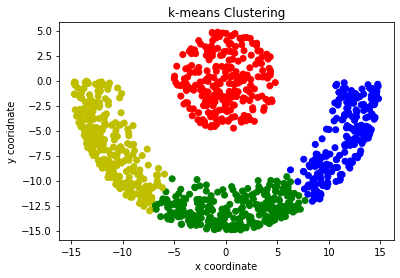

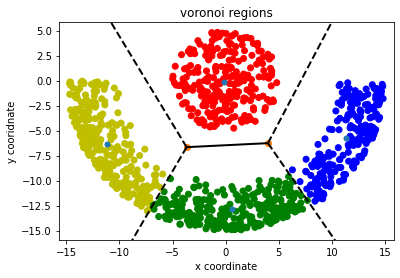

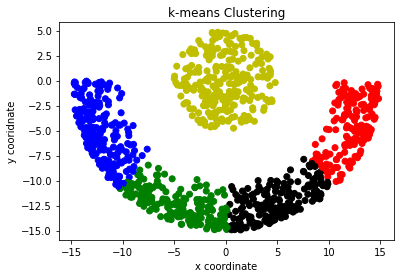

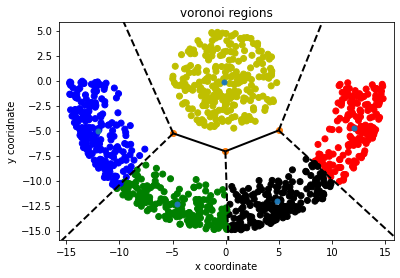

In [38]:
data=Y
from scipy.spatial import Voronoi, voronoi_plot_2d
for K in range(2,6):
    ind=random.choices(range(0,L-1),k=K)# randomly choosing k numbers from range of datset
    k_means=data[ind,:] # choosing the data points at indices corresponding to chosen numbers
    Z=np.zeros(L) # contains the cluster indicator at index i to corresponding ith data point
    objective_fun=[] #consists of objective function at each of all the iterations
    
    t=0
    while True:
        (error,INDICATOR)=(cluster_indicator(data,k_means))#passing the data to get the objective function and dataset indicators according to assigned clusters equal to the
        Z=np.array(INDICATOR)
        objective_fun.append(error)#appending objective functions at each iteration
        k_means=new_k_means(data,INDICATOR,K)#new means are being calculated accordinging to assigned clusters

        if t!=0 and objective_fun[t]==objective_fun[t-1]:#terminates the algorithm if the objective function at present iteration is less than equal to the the objective function at previous iteration
            break
        t=t+1

    #plotting clusters
    plt.title("k-means Clustering") 
    plt.xlabel("x coordinate") 
    plt.ylabel("y cooridnate")
    
    col = []
    col = np.where(Z==0,'y',np.where(Z==1,'b',np.where(Z==2,'r',np.where(Z==3,'g','k'))))
    plt.scatter(data[:,0], data[:,1], c=col)
    plt.show()
    
  
    midpoint=np.zeros((2))
    line=np.zeros((2,2))
    if K==2:
        slope=((k_means[1,1]-k_means[0,1])/(k_means[1,0]-k_means[0,0]))
        slope=-1/slope #calculating the slope of line perpendicular to the line joining the means
        midpoint[0],midpoint[1]=((k_means[1,0]+k_means[0,0])/2,(k_means[1,1]+k_means[0,1])/2)# finding the midpoint of the means
        c=midpoint[1]-slope*midpoint[0]
        (line[0,0],line[0,1])=(min(data[:,0]), slope*min(data[:,0])+c)
        (line[1,0],line[1,1])=(max(data[:,1]),slope*max(data[:,1])+c)
        
        #plotting the perpendicular bisector to the means and the half spaces
        plt.title("voronoi regions") 
        plt.xlabel("x coordinate") 
        plt.ylabel("y cooridnate")  

        plt.plot(line[:,0],line[:,1])
        plt.xlim(min(data[:,0]-1), max(data[:,0])+1)
        plt.ylim(min(data[:,1]-1), max(data[:,1])+1)
        plt.scatter(data[:,0], data[:,1], c=col)
        plt.show()



    if(K>2):    
        mean_Vor =list(k_means) 
        vor = Voronoi(mean_Vor)#using voronoi library to plot half spaces for more than 2 means
        voronoi_plot_2d(vor, line_width=2, line_alpha=1, point_size=10)#plots the half spaces
        
        #plotting voronoi regions
        plt.title("voronoi regions") 
        plt.xlabel("x coordinate") 
        plt.ylabel("y cooridnate")
        
        plt.scatter(data[:,0], data[:,1], c=col)
        plt.xlim(min(data[:,0]-1), max(data[:,0])+1)
        plt.ylim(min(data[:,1]-1), max(data[:,1])+1)
        plt.show()

# **Q(2)iii**

In [39]:
def spectral_clustering(H):
  def normalize_rows(X):
      norms = np.linalg.norm(X, axis=1)
      return X / norms[:, np.newaxis]
  data=normalize_rows(np.real(H))


  for rand_init in range(1):
      ind=random.choices(range(0,L-1),k=2)#k is number of means
      k_means=data[ind,:]
      z=np.zeros(L)
      objective_fun=[]
      
      t=0
      while True:
        old_k_mean=k_means
        (error,INDICATOR)=(cluster_indicator(data,k_means))
        Z=np.array(INDICATOR)
        objective_fun.append(error)
        k_means=new_k_means(data,INDICATOR,2)

        if t!=0 and objective_fun[t]==objective_fun[t-1]:
          break
        t=t+1

      #plotting clusters
      plt.title("Clustering") 
      plt.xlabel("x coordinate") 
      plt.ylabel("y cooridnate")
      
      col = []
      col = np.where(Z==0,'r','b')
      plt.scatter(Y[:,0], Y[:,1], c=col)
      plt.show()
      

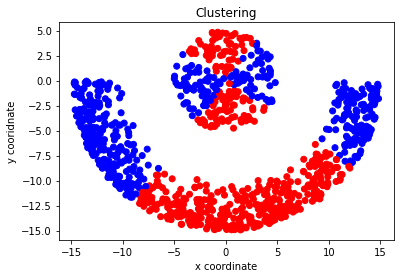

In [40]:
# for polynomial kernel
K_poly=np.zeros((L,L))
d=2   
for i in range(L):
    for j in range(L):
        if i<=j:
            K_poly[i,j]=(1+np.dot(Y[i],Y[j]))**d
            K_poly[j,i]=K_poly[i,j]


W,V=eig(K_poly)#finding eigen values and eigen vectors of radial basis kernel
idx=W.argsort()[::-1] #sorting the eigen values
V_sorted=V[:,idx] #sorting the eigen vectors
H2=V_sorted[:,:2]
spectral_clustering(H2)


<ipython-input-39-131aa41a9dd4>:4: RuntimeWarning: invalid value encountered in true_divide
  return X / norms[:, np.newaxis]


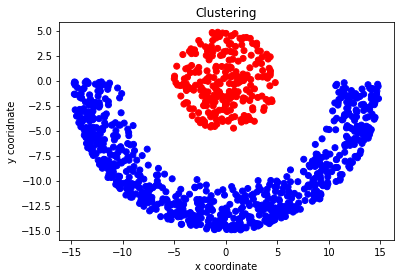

In [41]:
#rbf kernel
s=0.08
K_rad=np.zeros((L,L))
for i in range(L):
    for j in range(L):
        if i<=j:
              K_rad[i,j]=np.exp(-((norm(Y[i]-Y[j]))**2)/(2*s**2))
              K_rad[j,i]=K_rad[i,j]

W,V=eig(K_rad)#finding eigen values and eigen vectors of radial basis kernel
idx=W.argsort()[::-1] #sorting the eigen values
V_sorted=V[:,idx] #sorting the eigen vectors
H1=V_sorted[:,:2]
spectral_clustering(H1)

# **Q(2)iv**

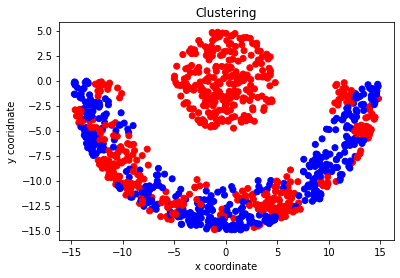

In [42]:
#rbf kernel
l=np.zeros((len(data)))
for i in range(len(data)):
    if H1[i,1]>H1[i,0]:
        l[i]=1
 #plotting clusters
plt.title("Clustering") 
plt.xlabel("x coordinate") 
plt.ylabel("y cooridnate")
    
col = []
col = np.where(l==0,'r','b')
plt.scatter(Y[:,0], Y[:,1], c=col)
plt.show()
